In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords') #Dowload list of stopwords

import collections
from collections import defaultdict
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re #Library used to remove certain symbols / characters from a text

##Opening Data And saving
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# 1.Load CS projects' CSVs
data_path = '/content/drive/Shareddrives/TFG_Cinta_Arnau/Code/Extracted_Projects/'

# Load table from csv file (Spanish and Catalan platform)
spanishCS = pd.read_csv(data_path + 'Spanish_CS_Projects.csv')
catalanCS = pd.read_csv(data_path + 'Catalan_CS_Projects.csv')

In [ ]:
def join_description(desc, info):
  return str(desc) + str(info)

catalanCS['Project Full Description'] = ['']*len(catalanCS)
catalanCS['Project Full Description'] = catalanCS.apply(lambda row: join_description(row['Project Description'], row['Project Info']), axis=1)
spanishCS['Project Full Description'] = ['']*len(spanishCS)
spanishCS['Project Full Description'] = spanishCS.apply(lambda row: join_description(row['Project Goal'], row['Project Description']), axis=1)

In [ ]:
catalanCS = catalanCS.rename(columns={'Project Info': 'Project Goal'})
cols_to_keep = ['Project Name', 'Project Link', 'Project Scope', 'Project Description', 'Project Goal', 'Project Full Description', 'Citizen Science Web Name', 'Citizen Science Web Link']
catalanCS = catalanCS[cols_to_keep]
spanishCS = spanishCS[cols_to_keep]

projectsCS = pd.DataFrame()
projectsCS = pd.concat([spanishCS, catalanCS])
projectsCS = projectsCS.reset_index(drop=True)

In [ ]:
projectsCS

,Project Name,Project Link,Project Scope,Project Description,Project Goal,Project Full Description,Citizen Science Web Name,Citizen Science Web Link
0,LADA-UC3M,https://ciencia-ciudadana.es/proyecto-cc/lada-...,Cultura y Arqueología,Es un laboratorio de ciencia ciudadana en el q...,Nuestro laboratorio pretende integrar a la com...,Nuestro laboratorio pretende integrar a la com...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
1,PAAM,https://ciencia-ciudadana.es/proyecto-cc/paam/,"Ciencias Sociales, Educación, Informática y Ci...","El proyecto programa PAAM, tiene dos fases:\nL...",El objetivo es llegar al máximo número de pers...,El objetivo es llegar al máximo número de pers...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
2,Cities at Night,https://ciencia-ciudadana.es/proyecto-cc/citie...,"Biodiversidad, Ecología y Medioambiente, Espac...",Cities at Night nace en 2014 liderada por el d...,"A nivel mundial, la luz artificial nocturna (A...","A nivel mundial, la luz artificial nocturna (A...",Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
3,FuenAragón,https://ciencia-ciudadana.es/proyecto-cc/fuena...,"Biodiversidad, Ciencias de la Agricultura y Ve...",El desarrollo del proyecto contaré con varias ...,El objetivo de FuenAragón es elaborar un mapa ...,El objetivo de FuenAragón es elaborar un mapa ...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
4,Laboratorio Ciudadano de Salud Urbana,https://ciencia-ciudadana.es/proyecto-cc/labor...,"Biodiversidad, Ecología y Medioambiente, Medic...",La ciudadanía tiene un rol fundamental a la ho...,El Laboratorio de Salud Urbana es un espacio c...,El Laboratorio de Salud Urbana es un espacio c...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
...,...,...,...,...,...,...,...,...
362,Red de Observadores Meteorológicos,https://www.barcelona.cat/barcelonaciencia/es/...,NaN,El Servicio Meteorológico de Cataluña creó en ...,Estas personas aportan información meteorológi...,El Servicio Meteorológico de Cataluña creó en ...,Ciencia Ciudadana Ayuntamiento de Barcelona,https://www.barcelona.cat/barcelonaciencia/es/...
363,Citi-Sense,https://www.barcelona.cat/barcelonaciencia/es/...,salud,Proyecto que pretende convertir a los ciudadan...,Con dispositivos móviles y sensores repartidos...,Proyecto que pretende convertir a los ciudadan...,Ciencia Ciudadana Ayuntamiento de Barcelona,https://www.barcelona.cat/barcelonaciencia/es/...
364,Saca La Lengua,https://www.barcelona.cat/barcelonaciencia/es/...,salud.,El proyecto quiere identificar la variedad de ...,Los ciudadanos y ciudadanas contribuyen en dis...,El proyecto quiere identificar la variedad de ...,Ciencia Ciudadana Ayuntamiento de Barcelona,https://www.barcelona.cat/barcelonaciencia/es/...
365,Ciencia ciudadana en los barrios,https://www.barcelona.cat/barcelonaciencia/es/...,NaN,A través de algunos de los proyectos de cienci...,"En este programa, los equipamientos se suman a...",A través de algunos de los proyectos de cienci...,Ciencia Ciudadana Ayuntamiento de Barcelona,https://www.barcelona.cat/barcelonaciencia/es/...


In [ ]:
# To check all unique project scopes
scopes = []

def separate_scopes(row_scopes, scopes):
  row_scopes = str(row_scopes).replace('.', '')
  proj_scopes = row_scopes.split(', ')
  for i in proj_scopes:
    if i not in scopes:
      scopes.append(i)

projectsCS.apply(lambda row: separate_scopes(row['Project Scope'], scopes), axis=1)
scopes.remove('nan')
print(scopes)

['Cultura y Arqueología', 'Ciencias Sociales', 'Educación', 'Informática y Ciencias de la Computación', 'Medicina y Salud', 'Biodiversidad', 'Ecología y Medioambiente', 'Espacio y Astronomía', 'Ciencias de la Agricultura y Veterinaria', 'Clima y Meteorología', 'Gestión de Recursos Naturales', 'Naturaleza y Aire Libre', 'Océanos', 'Agua', 'Marino y Terrestre', 'Transporte', 'Animales', 'Biogeografía', 'Ciencia de los Alimentos', 'Ciencias Químicas', 'Geografía', 'Geología y Ciencias de la Tierra', 'Insectos y Polinizadores', 'Ciencias Políticas', 'Culturas Indígenas', 'Pájaros', 'Sonido', 'Seguimiento de Especies a largo plazo', 'Física', 'Genética', 'Biología', 'social', 'ambiental', 'salud']


In [ ]:
#This function receives a line of text as input and returns a list of the words contained in it after having removed the stopwords and non-important symbols, 
#transforming to lowercase, tokenizing and stemming.

def build_terms(line): 
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("spanish"))
    line = line.lower()  #Convert to lowercase
    line = line.split()  # Tokenize the text to get a list of terms
    line = [x for x in line if x not in stop_words]  # eliminate the stopwords
    line = [x for x in line if x.startswith(("@", "https://", "$", '#')) != True]  # eliminate non-important symbols
    line = [re.sub('[^a-záéíóúäëïöü]+', '', x) for x in line] # since it's in spanish we only have to worry about 'closed' accents
    line = [stemmer.stem(word) for word in line] # perform stemming
    return line

In [ ]:
KC = input("Please enter the key competence: ")

Please enter the key competence: igualdad de género


In [ ]:
KC

'igualdad de género'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

projectsCS_clean = projectsCS.copy()

# STEP 1: Preprocess the data
projectsCS_clean['Project Full Description'].apply(build_terms)

# STEP 2: Create text embeddings
vectorizer = TfidfVectorizer()
text_embeddings = vectorizer.fit_transform(projectsCS_clean['Project Full Description'])

# STEP 3: Preprocess key competence
KC = build_terms(KC)

# STEP 4: Calculate similarity (cosine similarity)
input_embedding = vectorizer.transform(KC)
similarities = cosine_similarity(input_embedding, text_embeddings)

# Step 5: Output CS project recommendations
num_recommendations = 5  # Number of recommended projects to display
top_indices = similarities.argsort()[0][-num_recommendations:][::-1]  # Sort and get the top indices

print("Recommended Projects:")
for idx in top_indices:
    project = projectsCS.iloc[idx]
    print(f"- {project['Project Name']}: {project['Project Full Description']}")

Recommended Projects:
- CoAct (Co-designing Citizen Social Science for Collective Action)/ Co-diseñando la Ciencia Ciudadana Social para la Acción Colectiva: CoAct es un proyecto financiado por el programa Horizonte 2020 de la Unión Europea. CoAct propone una nueva comprensión de la Ciencia Ciudadana Social como investigación participativa co-diseñada e impulsada directamente por grupos de ciudadanos que comparten una preocupación social, en la que se convierten en co-investigadores en procesos comúnmente dominados por investigadores académicos. CoAct tiene como objetivo reunir y desarrollar métodos para dar a los grupos de ciudadanos un "asiento en la mesa" en igualdad de condiciones mediante la participación activa en la investigación, desde el diseño hasta la interpretación de los resultados y su transformación en acciones concretas.Trabajaremos simultáneamente con organizaciones de la sociedad civil en una amplia escala geográfica (España, Austria, Alemania, países de Europa del Es

In [ ]:
projectsCS.iloc[top_indices]

,Project Name,Project Link,Project Scope,Project Description,Project Goal,Project Full Description,Citizen Science Web Name,Citizen Science Web Link
80,CoAct (Co-designing Citizen Social Science for...,https://ciencia-ciudadana.es/proyecto-cc/coact...,"Ciencias Sociales, Informática y Ciencias de l...",Trabajaremos simultáneamente con organizacione...,CoAct es un proyecto financiado por el program...,CoAct es un proyecto financiado por el program...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
170,Universidad de los Pacientes,https://ciencia-ciudadana.es/proyecto-cc/unive...,"Biología, Medicina y Salud",La Universidad de los Pacientes es una univers...,NaN,nanLa Universidad de los Pacientes es una univ...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
245,Feminicidio.net,https://ciencia-ciudadana.es/proyecto-cc/femin...,"Ciencias Sociales, Informática y Ciencias de l...",Feminicidio.net es un proyecto sin fines de lu...,NaN,nanFeminicidio.net es un proyecto sin fines de...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
79,CoActuamos para la Salud Mental,https://ciencia-ciudadana.es/proyecto-cc/coact...,"Ciencias Sociales, Física, Informática y Cienc...","Dentro del marco de la ciencia ciudadana, la p...",CoActuamos para la Salud Mental quiere reforza...,CoActuamos para la Salud Mental quiere reforza...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/
116,Diviértete con la Estadística,https://ciencia-ciudadana.es/proyecto-cc/divie...,"Ecología y Medioambiente, Informática y Cienci...",NaN,Fomentar el aprendizaje y uso de la Estadístic...,Fomentar el aprendizaje y uso de la Estadístic...,Observatorio de la Ciencia Ciudadana en España,https://ciencia-ciudadana.es/proyecto-cc/


In [ ]:
top_idx_desc = []
for idx in top_indices:
  top_idx_desc.append(', '.join(build_terms(projectsCS_clean['Project Full Description'].iloc[idx])))

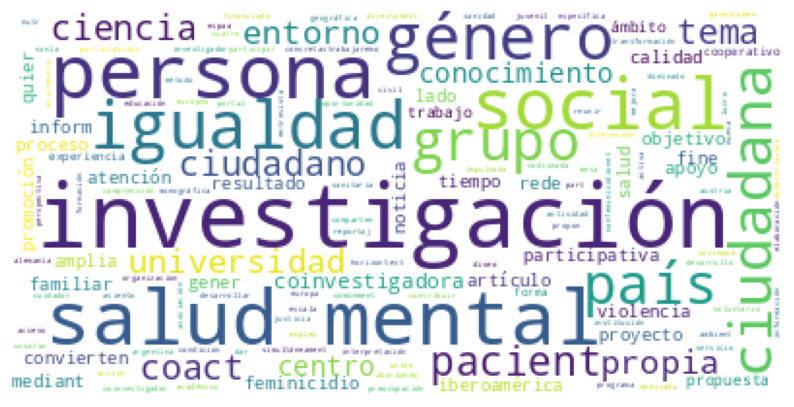

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_words=150, background_color="white").generate(', '.join(top_idx_desc))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()